<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>بيانات عبور الحدود</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            direction: rtl;
            background-color: #f8f9fa;
            margin: 0;
            padding: 20px;
            text-align: center;
        }
        .container {
            background-color: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            max-width: 600px;
            margin: auto;
        }
        h1 {
            color: #007bff;
        }
        p {
            line-height: 1.8;
            font-size: 18px;
            color: #333;
        }
        ul li {
            color: #d9534f;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>بيانات عبور الحدود</h1>
        <p>
            يحتوي ملف البيانات هذا على بيانات كاملة من يناير 1996 إلى فبراير 2020
            من إجمالي عدد العبور الوارد إلى الولايات المتحدة. يحتوي هذا الملف على 7 أعمدة تحدد:
        </p>
        <ul>
            <li>الميناء وشفرته الفريدة</li>
            <li>الحدود</li>
            <li>طريقة استخدام السيارة</li>
            <li>عدد الأشخاص الذين يعبرون الحدود إلى الولايات المتحدة</li>
            <li>تاريخ ووقت العبور</li>
            <li>الولاية التي دخلوا فيها</li>
        </ul>
    </div>
</body>
</html>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
import plotly.graph_objects as go
import statsmodels.api as sm
import scipy.stats as ss
from pylab import rcParams
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import plotly.express as px
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


<!DOCTYPE html>
<html lang="ar" dir="rlt">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>مقدمة تحليل البيانات</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl;
            background-color: #e3f2fd;
            color: #222;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #bbdefb);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(10, 10, 10);
        }
        h1 {
            text-align: center;
            color: #0d47a1;
            font-size: 28px;
        }
        ul {
            line-height: 2;
            font-size: 18px;
        }
        li {
            margin-bottom: 10px;
            padding: 10px;
            background: rgba(255, 255, 255, 0.8);
            border-radius: 8px;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>مقدمة</h1>
        <p>في هذا دفتر الملاحظات، سنحاول استكشاف البيانات التي لدينا ومحاولة الإجابة على أسئلة مثل:</p>
        <ul>
            <li>كيف يبدو اتجاه المعابر الحدودية؟</li>
            <li>هل هناك موسمية متماسكة؟</li>
            <li>هل هناك ارتفاعات أو انخفاضات حادة غير متوقعة، إذا كان الأمر كذلك، لماذا؟</li>
            <li>هل يمكننا التنبؤ بالإدخالات في المستقبل القريب؟</li>
            <li>ما هي الحدود والولاية الأكثر ازدحامًا من غيرها؟</li>
            <li>ما هي أنواع الدخول الأكثر شيوعًا؟</li>
            <li>هل للرؤساء تأثير ملحوظ على إجمالي المشاركات في ولايتهم؟</li>
        </ul>
    </div>
</body>
</html>

In [131]:
data = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [132]:
data.shape

(355511, 7)

In [133]:
data.sample(5)

,Port Name,State,Port Code,Border,Date,Measure,Value
102034,Neche,ND,3404,US-Canada Border,5/1/2012 00:00,Rail Containers Full,0
205078,Lancaster,MN,3430,US-Canada Border,12/1/2005 00:00,Personal Vehicle Passengers,8922
259804,Fortuna,ND,3417,US-Canada Border,6/1/2002 00:00,Bus Passengers,52
26989,Columbus,NM,2406,US-Mexico Border,5/1/2017 00:00,Buses,111
75770,Brownsville,TX,2301,US-Mexico Border,1/1/2014 00:00,Train Passengers,0


In [134]:
data['Date'] = pd.to_datetime(data['Date'])

In [135]:
data.rename(columns={'Value': 'Total Entries'}, inplace=True)

In [136]:


data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>تحليل بيانات السلاسل الزمنية</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(8, 8, 8);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p, ul {
            font-size: 18px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
        ul {
            line-height: 2;
        }
        li {
            margin-bottom: 10px;
            padding: 10px;
            background: rgba(255, 255, 255, 0.8);
            border-radius: 8px;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>تصور بيانات السلاسل الزمنية للدخول</h1>
        <p>
            يبدو أن إجمالي الإدخالات كان في اتجاه هبوطي بين عامي 2002 و 2012 ثم هناك زيادة طفيفة ولكنه مستقر إلى حد كبير
        </p>
        <p>
            عندما نفحص البيانات بالعين، يمكننا أن نرى أن هناك نوعًا من الموسمية مع 3 انخفاضات حادة منفصلة:
        </p>
        <ul>
            <li>الأول في مكان ما بين 1997-1998، لست متأكدًا من السبب وراء ذلك</li>
            <li>الثاني ما بين 2001-2002، من المحتمل جدًا أن يكون بسبب هجمات 11 سبتمبر</li>
            <li>الأخير بين 2008-2009، وربما يكون مرتبطًا بأزمة مالية عام 2008</li>
        </ul>
        <p>
            هناك نوع من التأثير الموسمي بالتأكيد، دعنا نفحصه في الفصل التالي
        </p>
    </div>
</body>
</html>


In [137]:

# إجراء التحليل الموسمي باستخدام statsmodels
decompose = sm.tsa.seasonal_decompose(
    tseries, model='additive', extrapolate_trend='freq')

# إنشاء الشكل باستخدام plotly مع 4 تقسيمات
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'],
    vertical_spacing=0.1
)

# إضافة المكونات إلى كل رسم فرعي
fig.add_trace(go.Scatter(x=decompose.observed.index, y=decompose.observed,
                         mode='lines', name='Observed', line=dict(color='blue', width=3)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=decompose.trend.index, y=decompose.trend,
                         mode='lines', name='Trend', line=dict(color='red', width=3, dash='dash')),
              row=2, col=1)

fig.add_trace(go.Scatter(x=decompose.seasonal.index, y=decompose.seasonal,
                         mode='lines', name='Seasonal', line=dict(color='green', width=3)),
              row=3, col=1)

fig.add_trace(go.Scatter(x=decompose.resid.index, y=decompose.resid,
                         mode='lines', name='Residual', line=dict(color='purple', width=3)),
              row=4, col=1)

# إعدادات الشكل
fig.update_layout(
    title='Decomposed Time Series',
    xaxis_title='Date',
    yaxis_title='Values',
    template='plotly_dark',
    showlegend=False,  # إخفاء الأسطورة لأنها ستكون واضحة من العناوين
    height=800,
    width=1200
)

# عرض الرسم
fig.show()


<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>التنبؤ باستخدام SARIMAX</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(46, 85, 125);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 18px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>SARIMAX التنبؤ باستخدام</h1>
        <p>
             ARIMA (متوسط ​​التحرك المتكامل الانحداري التلقائي)سنطبق إحدى أكثر طرق التنبؤ شيوعًا:
        </p>
        <p>
             من الطرق القوية في التنبؤ بالقيم المستقبلية للسلاسل الزمنية. تتكون من ثلاثة مكونات رئيسية ARIMA :تعتبر طريقه
           "Autoregressive" (AR)، و "Integrated" (I)، و "Moving Average" (MA) الـ .
        </p>
        <p>
            يتم تحسين ARIMA باستخدام SARIMAX (الموديل التكيفي للانحدار التلقائي مع المتغيرات الخارجية)، وهو إضافة قوية إلى النموذج التقليدي ARIMA، حيث يتيح لنا إضافة متغيرات تفسيرية تؤثر في التنبؤ.
        </p>
    </div>
</body>
</html>


In [138]:
# Choosing train data:

train = tseries.loc['2010':'2020']

In [139]:
# Examples for seasonality, trend, and noise combinations.

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [140]:
# Fitting the model.

mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0088      0.196      0.045      0.964      -0.376       0.394
ma.L1         -0.5945      0.123     -4.843      0.000      -0.835      -0.354
ar.S.L12      -0.1633      0.183     -0.890      0.373      -0.523       0.196
ma.S.L12       0.0030      0.206      0.014      0.989      -0.402       0.408
sigma2      4.103e+11   4.24e-13   9.67e+23      0.000     4.1e+11     4.1e+11


<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>التنبؤ باستخدام SARIMAX</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(12, 12, 12);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 22px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>التحقق من صحة نموذجنا</h1>
        <p>
             يبدو نموذجنا جيدًا، فلنستمر في التحقق من صحة توقعاتنا
        </p>
    
</div>
</body>
</html>


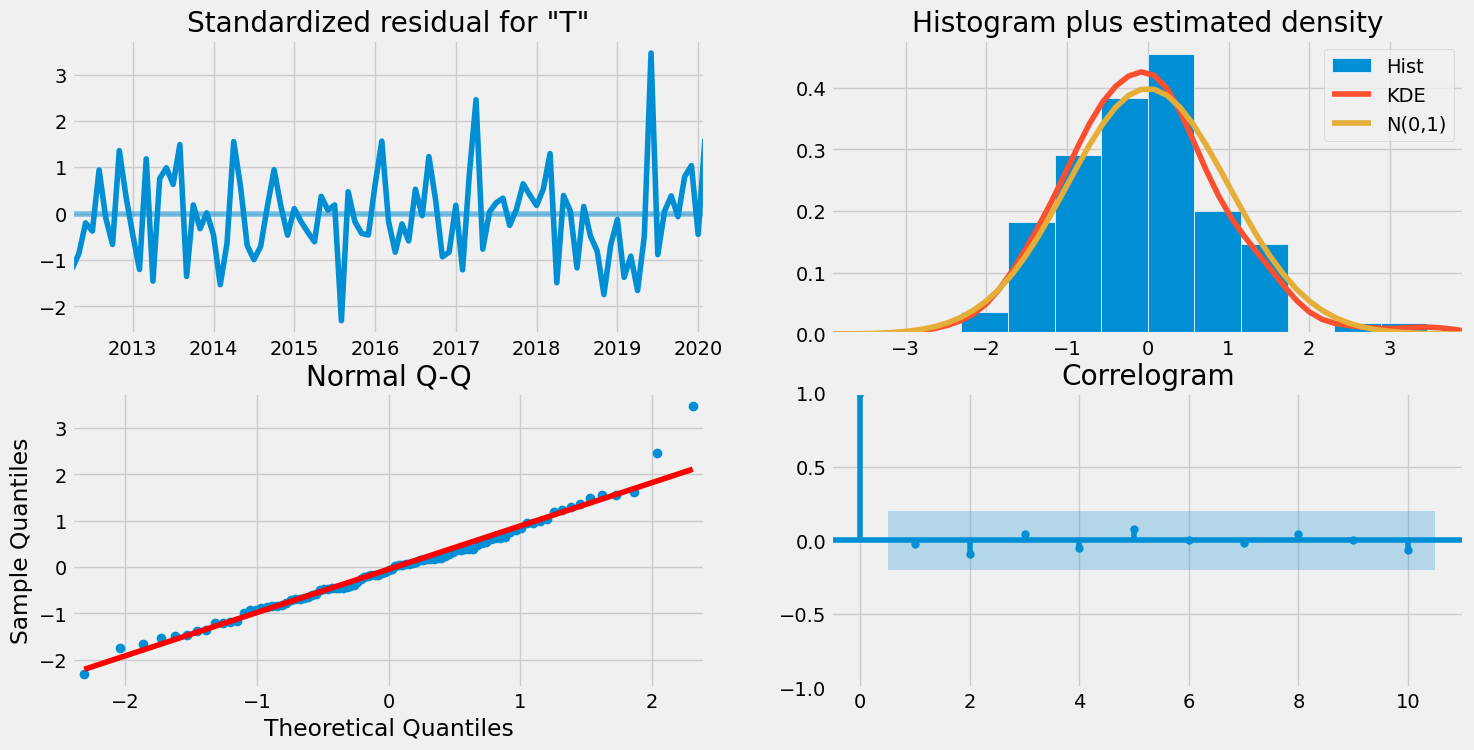

In [141]:
# Investigating the results:

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [142]:


# توليد التنبؤات
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# إنشاء الشكل التفاعلي
fig = go.Figure()

# السلسلة الزمنية الأصلية (القيم الفعلية)
fig.add_trace(go.Scatter(
    x=tseries.index, y=tseries['Total Entries'],
    mode='lines', name='Observed',
    line=dict(color='#1f77b4', width=2)
))

# التنبؤات (القيم المتوقعة)
fig.add_trace(go.Scatter(
    x=pred.predicted_mean.index, y=pred.predicted_mean,
    mode='lines', name='One-step ahead Forecast',
    line=dict(color='#ff7f0e', width=2, dash='dash')  # لون برتقالي مع خط متقطع
))

# فترات الثقة
fig.add_trace(go.Scatter(
    x=pred_ci.index.tolist() + pred_ci.index[::-1].tolist(),
    y=pred_ci.iloc[:, 1].tolist() + pred_ci.iloc[:, 0][::-1].tolist(),
    fill='toself', fillcolor='rgba(255, 165, 0, 0.5)',  # لون برتقالي شفاف
    line=dict(color='rgba(255,165,0,1)'),
    name='Confidence Interval'
))

# تخصيص المظهر
fig.update_layout(
    title="Time Series Forecast Validation",
    xaxis_title="Date",
    yaxis_title="Total Entries",
    template="plotly_white",
    width=1200, height=600,
    legend=dict(font=dict(size=14)),
    margin=dict(l=50, r=50, t=50, b=50)
)

# عرض الرسم
fig.show()


<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>التنبؤ باستخدام SARIMAX</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(12, 12, 12);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 22px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Simple Forecasting With Prophet</h1>
       
    
</div>
</body>
</html>


In [143]:
# Getting our train data ready for Prophet modelling. It needs exact namings...

train=train.reset_index(level=0)

train=train.rename(columns={'Date': 'ds', 'Total Entries': 'y'})

In [144]:
# Fitting the model with 0.90 confidence interval, 0.80 is default:

model = Prophet(interval_width = 0.90, seasonality_mode = 'additive')

model.fit(train)

23:32:53 - cmdstanpy - INFO - Chain [1] start processing
23:32:53 - cmdstanpy - INFO - Chain [1] done processing


In [145]:
# Creating a future dataframe with model for next 5 years.

future = model.make_future_dataframe(periods=60, freq='MS')

future.tail()

,ds
177,2024-10-01
178,2024-11-01
179,2024-12-01
180,2025-01-01
181,2025-02-01


In [146]:
# Predicting.

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,2.735133e+07,2.668665e+07,2.806533e+07
1,2010-02-01,2.482711e+07,2.413131e+07,2.546952e+07
2,2010-03-01,2.895565e+07,2.828915e+07,2.958055e+07
3,2010-04-01,2.796202e+07,2.730197e+07,2.857479e+07
4,2010-05-01,2.932883e+07,2.859837e+07,2.998924e+07


<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>التنبؤ باستخدام SARIMAX</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(12, 12, 12);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 22px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>نتائج النبي</h1>
        <p>
         مستقر إلى حد ما SARIMAXيبدو أن هناك فرقا طفيفا بين نموذجين ، في حين أن 
        </p>
         <p>
          انخفاضا في الإدخالات لمدة 5 سنوات قادمة. مع أحدث التطورات حول العالم Prophet يظهر 
        </p>
    
</div>
</body>
</html>



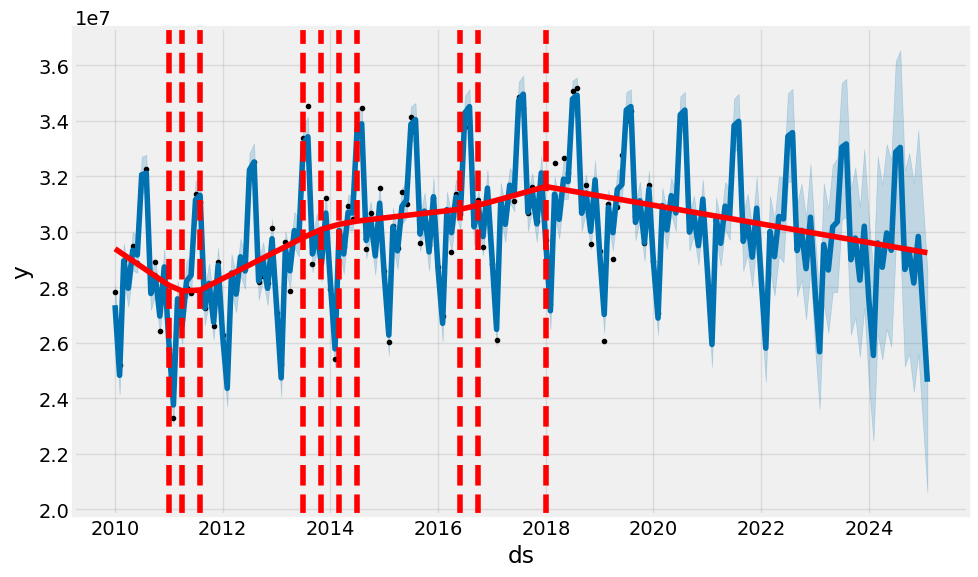

In [147]:


# # افترض أن لديك النموذج `model` والبيانات `forecast` جاهزة

# # بناء النموذج (افترض أن البيانات في `df`)
# model = Prophet()
# model.fit(data)

# # إجراء التنبؤات
# forecast = model.predict(data)

# رسم التنبؤات
fig = model.plot(forecast)

# إضافة النقاط التغييرية إلى الرسم البياني
add_changepoints_to_plot(fig.gca(), model, forecast)

# عرض الرسم البياني
plt.show()


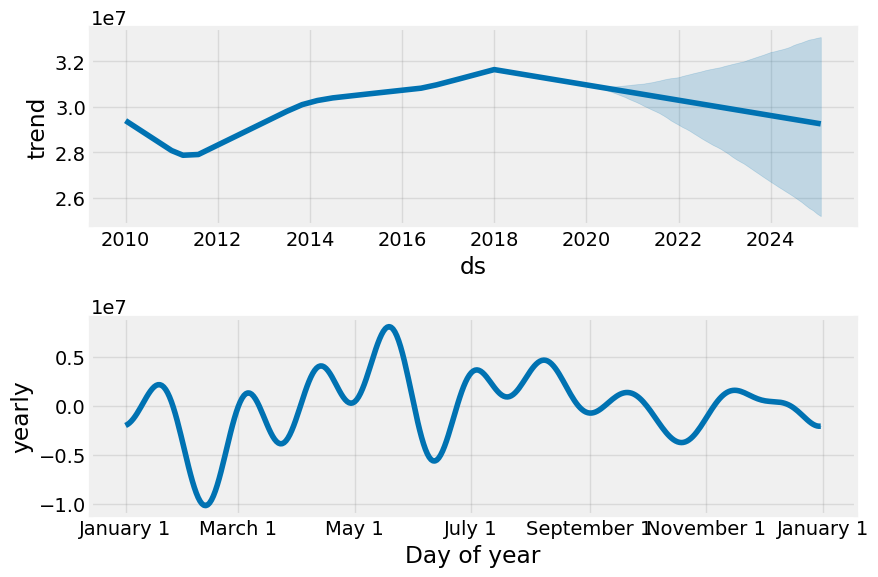

In [148]:
# Plotting the components of the series:

model.plot_components(forecast)
plt.show()

<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>الإدخالات حسب الشهر</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(8, 8, 8);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 20px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>الإدخالات حسب الشهر</h1>
        <p>
            يمكننا أن نرى التأثير الموسمي على الحدود الكندية أكثر بكثير من الحدود المكسيكية، حيث ترتفع الإدخالات الكندية في أشهر الصيف، 
            وفي الوقت نفسه، فإن الإدخالات المكسيكية مستقرة إلى حد ما.
        </p>
    </div>
</body>
</html>


In [149]:

month_data = data.groupby(['Month', 'Border'])['Total Entries'].agg(['sum']).reset_index().rename(columns={'sum': 'Total Entries'})

# إنشاء الرسم البياني باستخدام Plotly Express
fig = px.bar(month_data, x='Month', y='Total Entries', color='Border', 
             title='Total Entries by Month and Border', 
             labels={'Month': 'Month', 'Total Entries': 'Total Entries'},
             color_continuous_scale='Plasma')

# تخصيص وضع الأعمدة لتكون جنبًا إلى جنب
fig.update_layout(
    barmode='group',  # الأعمدة تظهر جنبًا إلى جنب
    title_font_size=20,
    xaxis_title='Month',
    yaxis_title='Total Entries',
    legend_title='Border',
    legend_font_size=15,
    legend_title_font_size=18,
    width=1200,
    height=600
)

# عرض الرسم البياني
fig.show()


<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>الإدخالات حسب الشهر</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(8, 8, 8);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 18px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>الإدخالات حسب السنه</h1>
        <p>
          حسنا ، من الواضح أنه بين عامي 2000 و 2011 هناك اتجاه متناقص ، خاصة بالنسبة للإدخالات المكسيكية ، وفي الوقت نفسه الإدخالات الكندية أكثر استقرارا إلى حد ما. ارتفعت الإدخالات المكسيكية قليلا بعد عام 2012 ولكن يبدو أنها تباطأت في عام 2019 ، ولا يمكننا التحدث عن عام 2020 حتى الآن نظرا لعدم وجود بيانات كافية
        </p>
    </div>
</body>
</html>


In [150]:


# تحضير البيانات كما في الكود السابق
year_data = data.groupby(['Year', 'Border'])['Total Entries'].agg(['sum']).reset_index().rename(columns={'sum': 'Total Entries'})

# رسم البيانات باستخدام Plotly مع تخصيص الألوان لزيادة الوضوح
fig = px.bar(year_data, x='Year', y='Total Entries', color='Border', 
             title='Total Entries by Year', 
             labels={'Total Entries': 'Total Entries', 'Year': 'Year'}, 
             color_discrete_sequence=px.colors.qualitative.Set2)  # لوحة ألوان متباينة وواضحة

# تحسين العرض وجعل الرسمة أكثر وضوحًا
fig.update_layout(
    title=dict(text='Total Entries by Year', font=dict(size=30, family='Arial', color='black'), x=0.5),
    xaxis_title="Year",
    yaxis_title="Total Entries",
    xaxis=dict(tickfont=dict(size=20), tickangle=45),  # تكبير حجم الخط على المحور X
    yaxis=dict(tickfont=dict(size=20)),  # تكبير حجم الخط على المحور Y
    legend=dict(font=dict(size=20)),  # تغيير حجم الخط في الأسطورة
    plot_bgcolor='white',  # خلفية بيضاء لتحسين وضوح الرسم
    barmode='group',  # عرض الأعمدة بشكل مجموعات
    bargap=0.1,  # تقليل المسافة بين الأعمدة
    bargroupgap=0.15  # تقليل المسافة بين مجموعات الأعمدة
)

# عرض الرسم
fig.show()


<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>الإدخالات حسب الشهر</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(8, 8, 8);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 18px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>الإدخالات حسب الولايه</h1>
        <p>
           عندما ننظر إلى إدخالات ولاية الولايات المتحدة ، يمكننا أن نرى أن تكساس وكاليفورنيا هما أكثر نقاط الدخول شيوعا للحدود المكسيكية ، وفي الوقت نفسه تعد نيويورك وميشيغان من الموانئ الرئيسية للإدخالات الكندية.
        </p>
    </div>
</body>
</html>


In [151]:

# بيانات الولاية
state_data = data.groupby(['State'])['Total Entries'].agg(
    ['sum']).reset_index().sort_values('sum', ascending=False).rename(columns={'sum': 'Total Entries'})

# ترتيب الولايات حسب العدد بحيث الولاية التي تحتوي على أكبر عدد في الأعلى
fig = px.bar(state_data, 
             x='Total Entries', 
             y='State', 
             title="Total Entries by State",
             color='Total Entries', 
             color_continuous_scale='plasma',
             category_orders={'State': state_data['State'].tolist()})  # عكس ترتيب الولايات في المحور الأفقي

# عرض الرسم البياني
fig.show()


<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>الإدخالات حسب الشهر</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(8, 8, 8);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 18px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>الإدخالات حسب النوع</h1>
        <p>
           أكثر أنواع الدخول شيوعا لكلا الحدين هي المركبات الشخصية لكلا الحدودين تليها مداخل المشاة. مداخل المشاة أكثر شيوعا في حدود المكسيك. النوع الثالث الأكثر شيوعا هو الشاحنات وهذا النوع من العبور أكثر شيوعا على الحدود الكندية. يمكننا أيضا القول أن معظم الشاحنات التي تدخل الولايات المتحدة من المكسيك لأغراض الاستيراد لأنها تبدو وكأنها تدخل بحاويات شاحنات فارغة وفي الوقت نفسه على الحدود الكندية ، فإن الأمر عكس ذلك تماما 
        </p>
    </div>
</body>
</html>


In [152]:

# بيانات القياس
measure_data = data.groupby(['Border', 'Measure'])['Total Entries'].agg(
    ['sum']).reset_index().sort_values('sum', ascending=False).rename(columns={'sum': 'Total Entries'})

# رسم بياني باستخدام plotly
fig = px.bar(measure_data, 
             x='Total Entries', 
             y='Measure', 
             color='Border', 
             orientation='h',  # لتكون الأشرطة أفقية
             title="Total Entries by Measure and Border",
             color_continuous_scale='plasma')

# تخصيص ترتيب الأشرطة لتكون بجانب بعضها
fig.update_layout(
    barmode='group',  # لجعل الأشرطة تظهر بجانب بعضها بدلاً من مكدسة
    yaxis_categoryorder='total ascending',  # ترتيب القيم في المحور الرأسي بحيث الأكبر في الأعلى
)

# تخصيص الأساطير
fig.update_layout(
    legend_title="Border",
    legend=dict(
        x=1,  # وضع الأسطورة في الجهة اليمنى
        y=1,
        traceorder="normal",
        font=dict(size=20),
        bgcolor="rgba(255, 255, 255, 0)",
        bordercolor="Black",
        borderwidth=2
    )
)

# عرض الرسم البياني
fig.show()


In [153]:
data_m = data.groupby('Measure')['Total Entries'].agg(
    ['sum']).sort_values('sum', ascending=False).reset_index().rename(columns={'sum': 'Total Entries'})

data_m.head(50)

,Measure,Total Entries
0,Personal Vehicle Passengers,5629526756
1,Personal Vehicles,2651535415
2,Pedestrians,1090067964
3,Trucks,264731943
4,Truck Containers Full,185463194
5,Bus Passengers,146027374
6,Truck Containers Empty,67036035
7,Rail Containers Full,40492650
8,Rail Containers Empty,22386399
9,Buses,8754394


In [154]:
per_d = data_m.pivot_table(index=None, columns='Measure',
                           values='Total Entries').reset_index().drop('index', axis=1)

per_d['Per Bus'] = per_d['Bus Passengers'] / per_d['Buses']

per_d['Per Train'] = per_d['Train Passengers'] / per_d['Trains']

per_d['Per Car'] = per_d['Personal Vehicle Passengers'] / \
    per_d['Personal Vehicles']

<!DOCTYPE html>
<html lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>الإدخالات حسب الشهر</title>
    <style>
        body {
            font-family: 'Tajawal', sans-serif;
            direction: rtl; /* النص يبدأ من اليمين لليسار */
            background-color: #f1f8e9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 850px;
            background: linear-gradient(135deg, #ffffff, #c8e6c9);
            padding: 25px;
            margin: auto;
            border-radius: 15px;
            box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
            color:rgb(8, 8, 8);
        }
        h1 {
            text-align: center; /* العنوان في المنتصف */
            color: #2e7d32;
            font-size: 28px;
        }
        p {
            font-size: 18px;
            line-height: 1.8;
            text-align: right; /* تأكيد أن النص يبدأ من اليمين لليسار */
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>متوسط ​​عدد الركاب المدخلين لكل نوع مركبة</h1>
       
</div>
</body>
</html>


In [155]:


# تحويل البيانات إلى الشكل المطلوب
per_dc = per_d.unstack().reset_index(name='Total Entries').drop('level_1', axis=1)

# تصفية البيانات بناءً على القيم المحددة في "Measure"
filtered_data = per_dc[per_dc['Measure'].isin(['Per Bus', 'Per Train', 'Per Car'])]

# رسم بياني باستخدام plotly
fig = px.bar(filtered_data, 
             x='Measure', 
             y='Total Entries', 
             color='Measure',  # لتلوين الأشرطة بناءً على النوع
             title="Passenger Entries per Vehicle Type",
             color_discrete_sequence=px.colors.sequential.Plasma)

# تخصيص الأساطير
fig.update_layout(
    legend_title="Measure Type",
    legend=dict(
        x=1,  # وضع الأسطورة في الجهة اليمنى
        y=1,
        traceorder="normal",
        font=dict(size=20),
        bgcolor="rgba(255, 255, 255, 0)",
        bordercolor="Black",
        borderwidth=2
    )
)

# عرض الرسم البياني
fig.show()


In [156]:
# Mapping the presidents:

conditions = [(data['Date'] <= '1997-01-20'),
              (data['Date'] >= '1997-01-20') & (data['Date'] < '2001-01-20'),
              (data['Date'] >= '2001-01-20') & (data['Date'] < '2005-01-20'),
              (data['Date'] >= '2005-01-20') & (data['Date'] < '2009-01-20'),
              (data['Date'] >= '2009-01-20') & (data['Date'] < '2013-01-20'),
              (data['Date'] >= '2003-01-20') & (data['Date'] < '2017-01-20'),
              (data['Date'] >= '2017-01-20')]
choices = [
    'Clinton 1st Term (Last Year)', 'Clinton 2nd Term', 'G. Bush 1st Term',
    'G. Bush 2nd Term', 'Obama 1st Term', 'Obama 2nd Term',
    'Trump 1st Term (First 3 Years)'
]

data['President'] = np.select(conditions, choices, default='None')

In [157]:


# بيانات الرئيس
pres_data = data.groupby(['President', 'Border'])['Total Entries'].agg(
    ['sum']).reset_index().sort_values('President').rename(
        columns={'sum': 'Total Entries'})

# رسم بياني باستخدام plotly
fig = px.bar(pres_data, 
             x='Total Entries', 
             y='President', 
             color='Border',  # تلوين الأشرطة بناءً على 'Border'
             title="Total Entries by President",
             color_discrete_sequence=px.colors.sequential.Viridis,  # تغيير اللون هنا
             orientation='h',  # لتكون الأشرطة أفقية
             labels={'Total Entries': 'Total Entries', 'President': 'President'})

# تخصيص الأساطير
fig.update_layout(
    barmode='group',  # لتكون الأشرطة جنبًا إلى جنب
    legend_title="Border",
    legend=dict(
        x=1,  # وضع الأسطورة في الجهة اليمنى
        y=1,
        traceorder="normal",
        font=dict(size=20),
        bgcolor="rgba(255, 255, 255, 0)",
        bordercolor="Black",
        borderwidth=2
    )
)

# عرض الرسم البياني
fig.show()
